# **Practical 5:**
Aim: ANOVA (Analysis of Variance)
*   Perform one-way ANOVA to compare means across multiple groups.
*   Conduct post-hoc tests to identify significant differences between group means.


**1. ANOVA (F-TEST)**

--- ANOVA Results ---
Locations tested: ['USA', 'China', 'Japan', 'United Kingdom', 'France']
F-statistic: 19.182617619897638
p-value for significance is:  3.607796921016311e-15
Reject the null hypothesis (since p < 0.05): There is a statistically significant difference in mean scores among these locations.


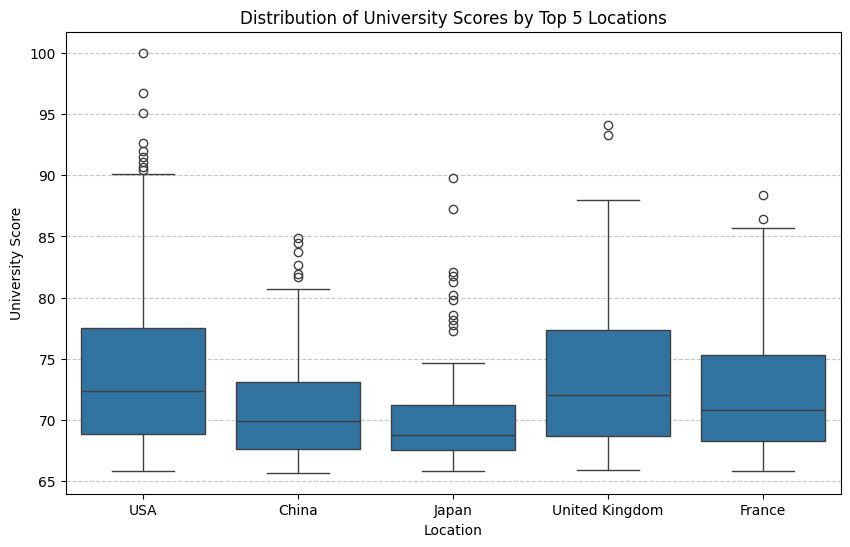

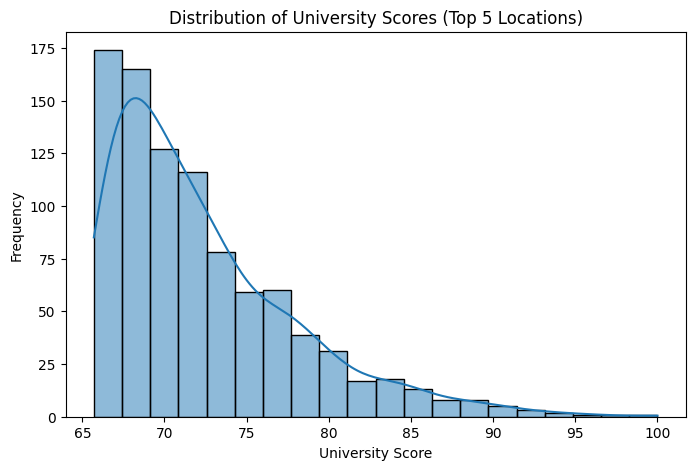

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_anova = pd.read_csv('WORLD UNIVERSITY RANKINGS.csv')

# --- Data Preparation ---
# 1. Identify the top 5 locations for the ANOVA test
# This ensures we have groups with sufficient data points
top_5_locations = df_anova['Location'].value_counts().head(5).index.tolist()
df_filtered = df_anova[df_anova['Location'].isin(top_5_locations)]

# 2. Select the necessary columns
df_anova_ready = df_filtered[['Score', 'Location']]

# 3. Create a dictionary of scores grouped by location
grps = pd.unique(df_anova_ready.Location.values)
# Dictionary comprehension to get a list of scores for each location
d_data = {grp:df_anova_ready['Score'][df_anova_ready.Location == grp].astype(float) for grp in grps}

# --- ANOVA Test ---
# Null Hypothesis (H0): The mean university score is the same across the top 5 locations.
# Alternative Hypothesis (H1): At least one location's mean score is different.
F, p = stats.f_oneway(*d_data.values())

print("--- ANOVA Results ---")
print("Locations tested:", top_5_locations)
print("F-statistic:", F)
print("p-value for significance is: ", p)

# Conclusion
alpha = 0.05
if p < alpha:
    print(f"Reject the null hypothesis (since p < {alpha}): There is a statistically significant difference in mean scores among these locations.")
else:
    print(f"Fail to reject the null hypothesis (since p >= {alpha}): There is no statistically significant difference in mean scores among these locations.")

# --- Visualization Code ---

# 1. Box Plot: Score by Location (Top 5)
plt.figure(figsize=(10, 6))
# Plotting the data, ordering the locations by their count (highest first)
sns.boxplot(x='Location', y='Score', data=df_anova_ready, order=df_anova_ready['Location'].value_counts().index)
plt.title('Distribution of University Scores by Top 5 Locations')
plt.xlabel('Location')
plt.ylabel('University Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() # Uncomment if running locally

# 2. Distribution Plot: Overall Score Distribution
plt.figure(figsize=(8, 5))
# Histogram with KDE line to show the overall shape of the score distribution
sns.histplot(df_anova_ready['Score'], kde=True, bins=20)
plt.title('Distribution of University Scores (Top 5 Locations)')
plt.xlabel('University Score')
plt.ylabel('Frequency')
plt.show() # Uncomment if running locally

**2. Two Way ANOVA F-test**

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
df_anova2 = pd.read_csv('WORLD UNIVERSITY RANKINGS.csv')

# --- Data Preparation: Define Factors ---

# 1. Factor 1 (A): Location (Filter to Top 5 for manageable analysis)
top_5_locations = df_anova2['Location'].value_counts().head(5).index.tolist()
df_filtered = df_anova2[df_anova2['Location'].isin(top_5_locations)].copy()

# 2. Factor 2 (B): Create a Rank Group (Categorical)
# We need to convert the continuous 'World Rank' into a few categorical levels
bins = [0, 100, 500, np.inf]
labels = ['Top 100', '101-500', '501+']
df_filtered['Rank_Group'] = pd.cut(
    df_filtered['World Rank'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# --- Two-Way ANOVA with Interaction ---
# Formula: Score is dependent on Location, Rank Group, and their interaction.
# C() tells statsmodels to treat the variables as categorical factors.
model = ols('Score ~ C(Location) * C(Rank_Group)', data=df_filtered).fit()

# Print Overall Model Summary
# F-statistic, degrees of freedom, and p-value for the overall model fit
print("--- Two-Way ANOVA Overall Model Summary ---")
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Get the ANOVA table (Type 3 is appropriate for unbalanced designs like this)
res = sm.stats.anova_lm(model, typ=3)
print("\nANOVA Summary Table (Type III) for Individual Effects:\n")
print(res)

# You can also use Type 2 if you prefer:
# res_type2 = sm.stats.anova_lm(model, typ=2)
# print("\nANOVA Summary Table (Type II):\n")
# print(res_type2)

--- Two-Way ANOVA Overall Model Summary ---
Overall model F( 14, 911) =  307.463, p =  0.0000

ANOVA Summary Table (Type III) for Individual Effects:

                                 sum_sq     df            F         PR(>F)
Intercept                  34894.658000    1.0  6022.767717   0.000000e+00
C(Location)                   48.227418    4.0     2.080996   8.134168e-02
C(Rank_Group)               3520.140473    2.0   303.785588  8.258646e-102
C(Location):C(Rank_Group)     57.297720    8.0     1.236188   2.743740e-01
Residual                    5278.143692  911.0          NaN            NaN


/tmp/ipython-input-3702538665.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Treatment_Group', y='Score', data=df_filtered, order=order, palette='Set2')


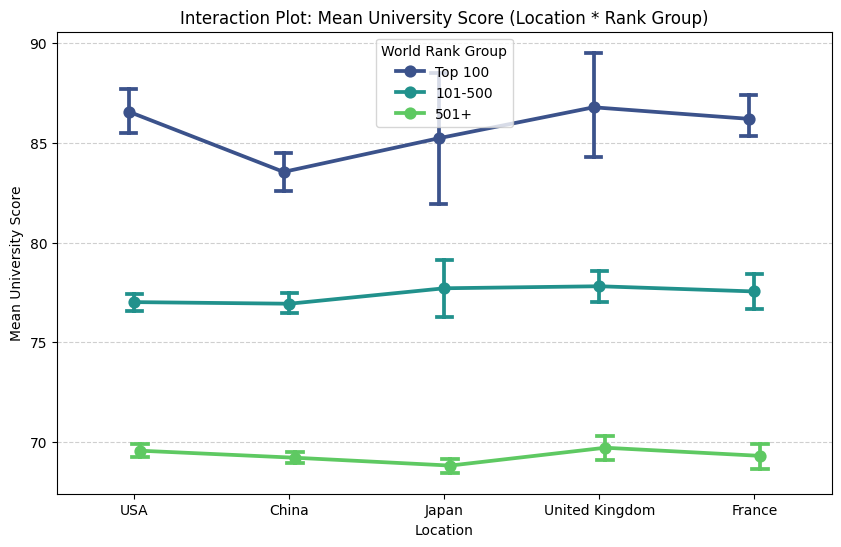

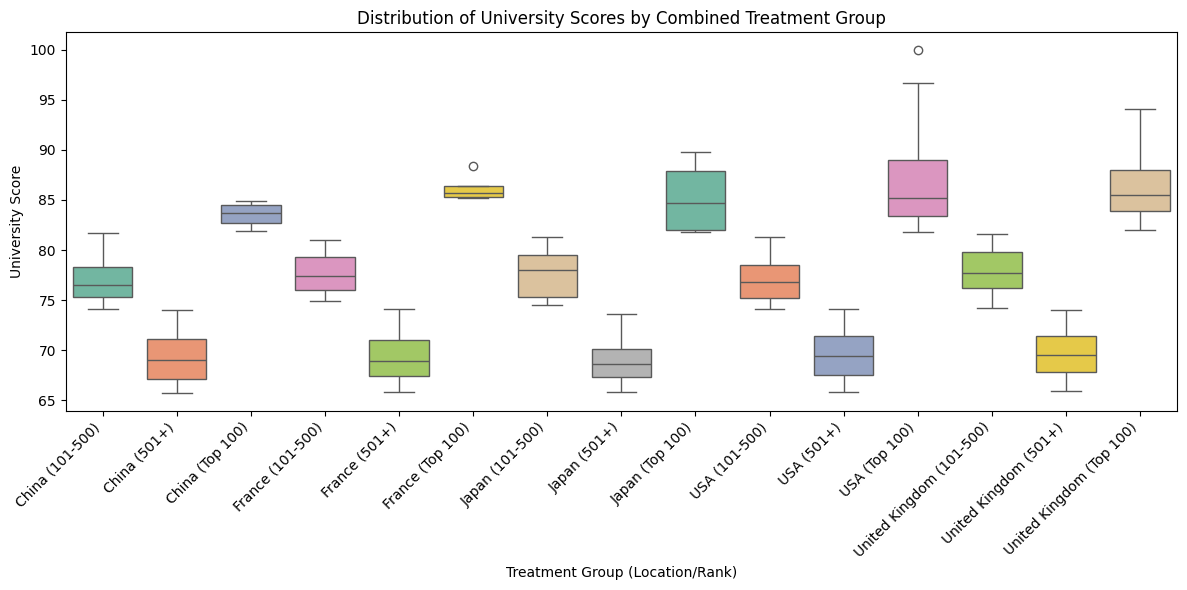

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# df_filtered contains 'Score', 'Location' (Top 5), and 'Rank_Group' (3 bins)

# Define factors and their order based on the previous preparation steps
top_5_locations = ['USA', 'China', 'Japan', 'United Kingdom', 'France']
labels = ['Top 100', '101-500', '501+']


# 1. Interaction Plot: Mean Score by Location and Rank Group
# This plot helps visualize the interaction effect (Location * Rank_Group).
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_filtered, x='Location', y='Score', hue='Rank_Group',
              errorbar=('ci', 95), dodge=True, capsize=0.1,
              palette='viridis',
              order=top_5_locations,
              hue_order=labels)

plt.title('Interaction Plot: Mean University Score (Location * Rank Group)')
plt.xlabel('Location')
plt.ylabel('Mean University Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='World Rank Group')
plt.savefig('two_way_anova_university_interaction_plot.png')
# plt.show()


# 2. Grouped Box Plot of all Treatment Combinations
# This visualization shows the distribution of Score for all 15 combined groups (e.g., USA_Top 100).
df_filtered['Treatment_Group'] = df_filtered['Location'] + ' (' + df_filtered['Rank_Group'].astype(str) + ')'
plt.figure(figsize=(12, 6))

# Sort groups alphabetically for clean display
order = sorted(df_filtered['Treatment_Group'].unique())
sns.boxplot(x='Treatment_Group', y='Score', data=df_filtered, order=order, palette='Set2')

plt.title('Distribution of University Scores by Combined Treatment Group')
plt.xlabel('Treatment Group (Location/Rank)')
plt.ylabel('University Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('two_way_anova_university_grouped_boxplot.png')
# plt.show()

# Clean up the temporary column
df_filtered.drop(columns=['Treatment_Group'], inplace=True, errors='ignore')